# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv('craftcans.csv', na_values=['Does not apply', 'Other'])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
df.groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head(10).reset_index()

,Brewery,Beer
0,Brewery Vivant,62
1,Oskar Blues Brewery,41
2,Sun King Brewing Company,38
3,Cigar City Brewing Company,24
4,Sixpoint Craft Ales,24
5,Great Crescent Brewery,20
6,21st Amendment Brewery,19
7,SanTan Brewing Company,19
8,Upslope Brewing Company,18
9,Great River Brewery,18


## What is the most common ABV? (alcohol by volume)

In [6]:
df["ABV"].value_counts().head().reset_index()

,ABV,count
0,5.00%,215
1,5.50%,158
2,6.00%,125
3,6.50%,123
4,5.20%,107


## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df['ABV'].reset_index()

,index,ABV
0,0,4.50%
1,1,4.90%
2,2,4.80%
3,3,6.00%
4,4,6.00%
5,5,5.60%
6,6,8.00%
7,7,12.50%
8,8,7.70%
9,9,4.20%


### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
#df['ABV'] = df['ABV'].str.strip('%')
df['ABV'] = df['ABV'].str.replace('%', '')
df['ABV'].reset_index()

,index,ABV
0,0,4.50
1,1,4.90
2,2,4.80
3,3,6.00
4,4,6.00
5,5,5.60
6,6,8.00
7,7,12.50
8,8,7.70
9,9,4.20


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [9]:
df['ABV'] = df['ABV'].astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
mean = df['ABV'].mean()
median = df['ABV'].median()
print(f"The ABV mean is {mean:.2f} and the median is {median}.") 

The ABV mean is 5.98 and the median is 5.6.


<Axes: ylabel='Frequency'>

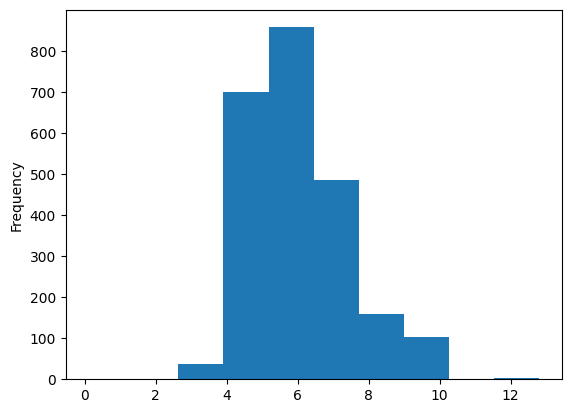

In [11]:
df['ABV'].plot(kind = 'hist')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [12]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [13]:
df.groupby('Location')['Brewery'].nunique().sort_values(ascending=False).head(10).reset_index()


,Location,Brewery
0,"Portland, OR",11
1,"Boulder, CO",9
2,"Chicago, IL",9
3,"Seattle, WA",9
4,"Austin, TX",8
5,"Denver, CO",8
6,"San Diego, CA",8
7,"Bend, OR",6
8,"Portland, ME",6
9,"San Francisco, CA",5


## List all of the beer from Brooklyn, NY

In [14]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [15]:
df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts().head(1).reset_index()

,Brewery,count
0,Sixpoint Craft Ales,24


## What are the five most common styles of beer produced by Sixpoint?

In [16]:
df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(5).reset_index()

,Style,count
0,American IPA,4
1,Baltic Porter,2
2,American Double / Imperial IPA,2
3,German Pilsener,2
4,Cream Ale,2


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [17]:
df['Location'].isnull().value_counts().reset_index()

,Location,count
0,False,2410
1,True,6


In [18]:
df['Location'].fillna('USA', inplace=True)

/var/folders/27/ypvsym_j55zflx4p_4nss_mr0000gn/T/ipykernel_2021/2941865955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna('USA', inplace=True)


In [19]:
df['Location'].isnull().value_counts().reset_index()

,Location,count
0,False,2416


In [20]:
NY_breweries = df[df['Location'].str.contains('NY')]
print(NY_breweries.to_string())

                                  Beer                        Brewery           Location                                Style               Size   ABV   IBUs
115                             4Beans            Sixpoint Craft Ales       Brooklyn, NY                        Baltic Porter             12 oz.  10.0   52.0
210                             Jammer            Sixpoint Craft Ales       Brooklyn, NY                                 Gose    12 oz. Slimline   4.2   16.0
246                            Abigale            Sixpoint Craft Ales       Brooklyn, NY                     Belgian Pale Ale             12 oz.   8.0    NaN
404                      Nomader Weiss              Evil Twin Brewing       Brooklyn, NY                   Berliner Weissbier             12 oz.   4.0    NaN
421                                Rad            Sixpoint Craft Ales       Brooklyn, NY               Fruit / Vegetable Beer             16 oz.   3.2    7.0
439                       Molotov Lite              

### Now *count* all of the breweries in New York state

In [21]:
print(f"There are {len(NY_breweries)} breweries in NY state")

There are 74 breweries in NY state


# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [22]:
df['Style'].isnull().value_counts().reset_index()

,Style,count
0,False,2404
1,True,12


In [23]:
df['Style'].fillna('Other', inplace=True)

/var/folders/27/ypvsym_j55zflx4p_4nss_mr0000gn/T/ipykernel_2021/2702419361.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Style'].fillna('Other', inplace=True)


In [24]:
IPAs = df[df['Style'].str.contains('IPA')]
print(IPAs.to_string()).reset_index()

                                                 Beer                              Brewery                 Location                           Style               Size  ABV   IBUs
0                                        Get Together                    NorthGate Brewing          Minneapolis, MN                    American IPA             16 oz.  4.5   50.0
6                                      Citra Ass Down            Against the Grain Brewery           Louisville, KY  American Double / Imperial IPA             16 oz.  8.0   68.0
14                                        Rico Sauvin            Against the Grain Brewery           Louisville, KY  American Double / Imperial IPA             16 oz.  7.6   68.0
17                                       Pile of Face            Against the Grain Brewery           Louisville, KY                    American IPA             16 oz.  6.0   65.0
24                                     Habitus (2014)            Mike Hess Brewing Company            San

AttributeError: 'NoneType' object has no attribute 'reset_index'

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [ ]:
df['IBUs'].mean()

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [ ]:
df['IBUs'].value_counts()

In [ ]:
df['IBUs'] = df['IBUs'].astype(float)
print(df['IBUs'].mean())

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

In [ ]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [39]:
major_percentile = df['IBUs'].quantile(0.75)

In [40]:
df[df['IBUs'] > major_percentile]

    

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


## List all of the beers with IBUs below the 25th percentile

In [41]:
minor_percentile = df['IBUs'].quantile(0.25)
df[df['IBUs'] < minor_percentile]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.1,12.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [42]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=False, na_position='last')

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
English Strong Ale                     52.0
Baltic Porter                          52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

<Axes: ylabel='Style'>

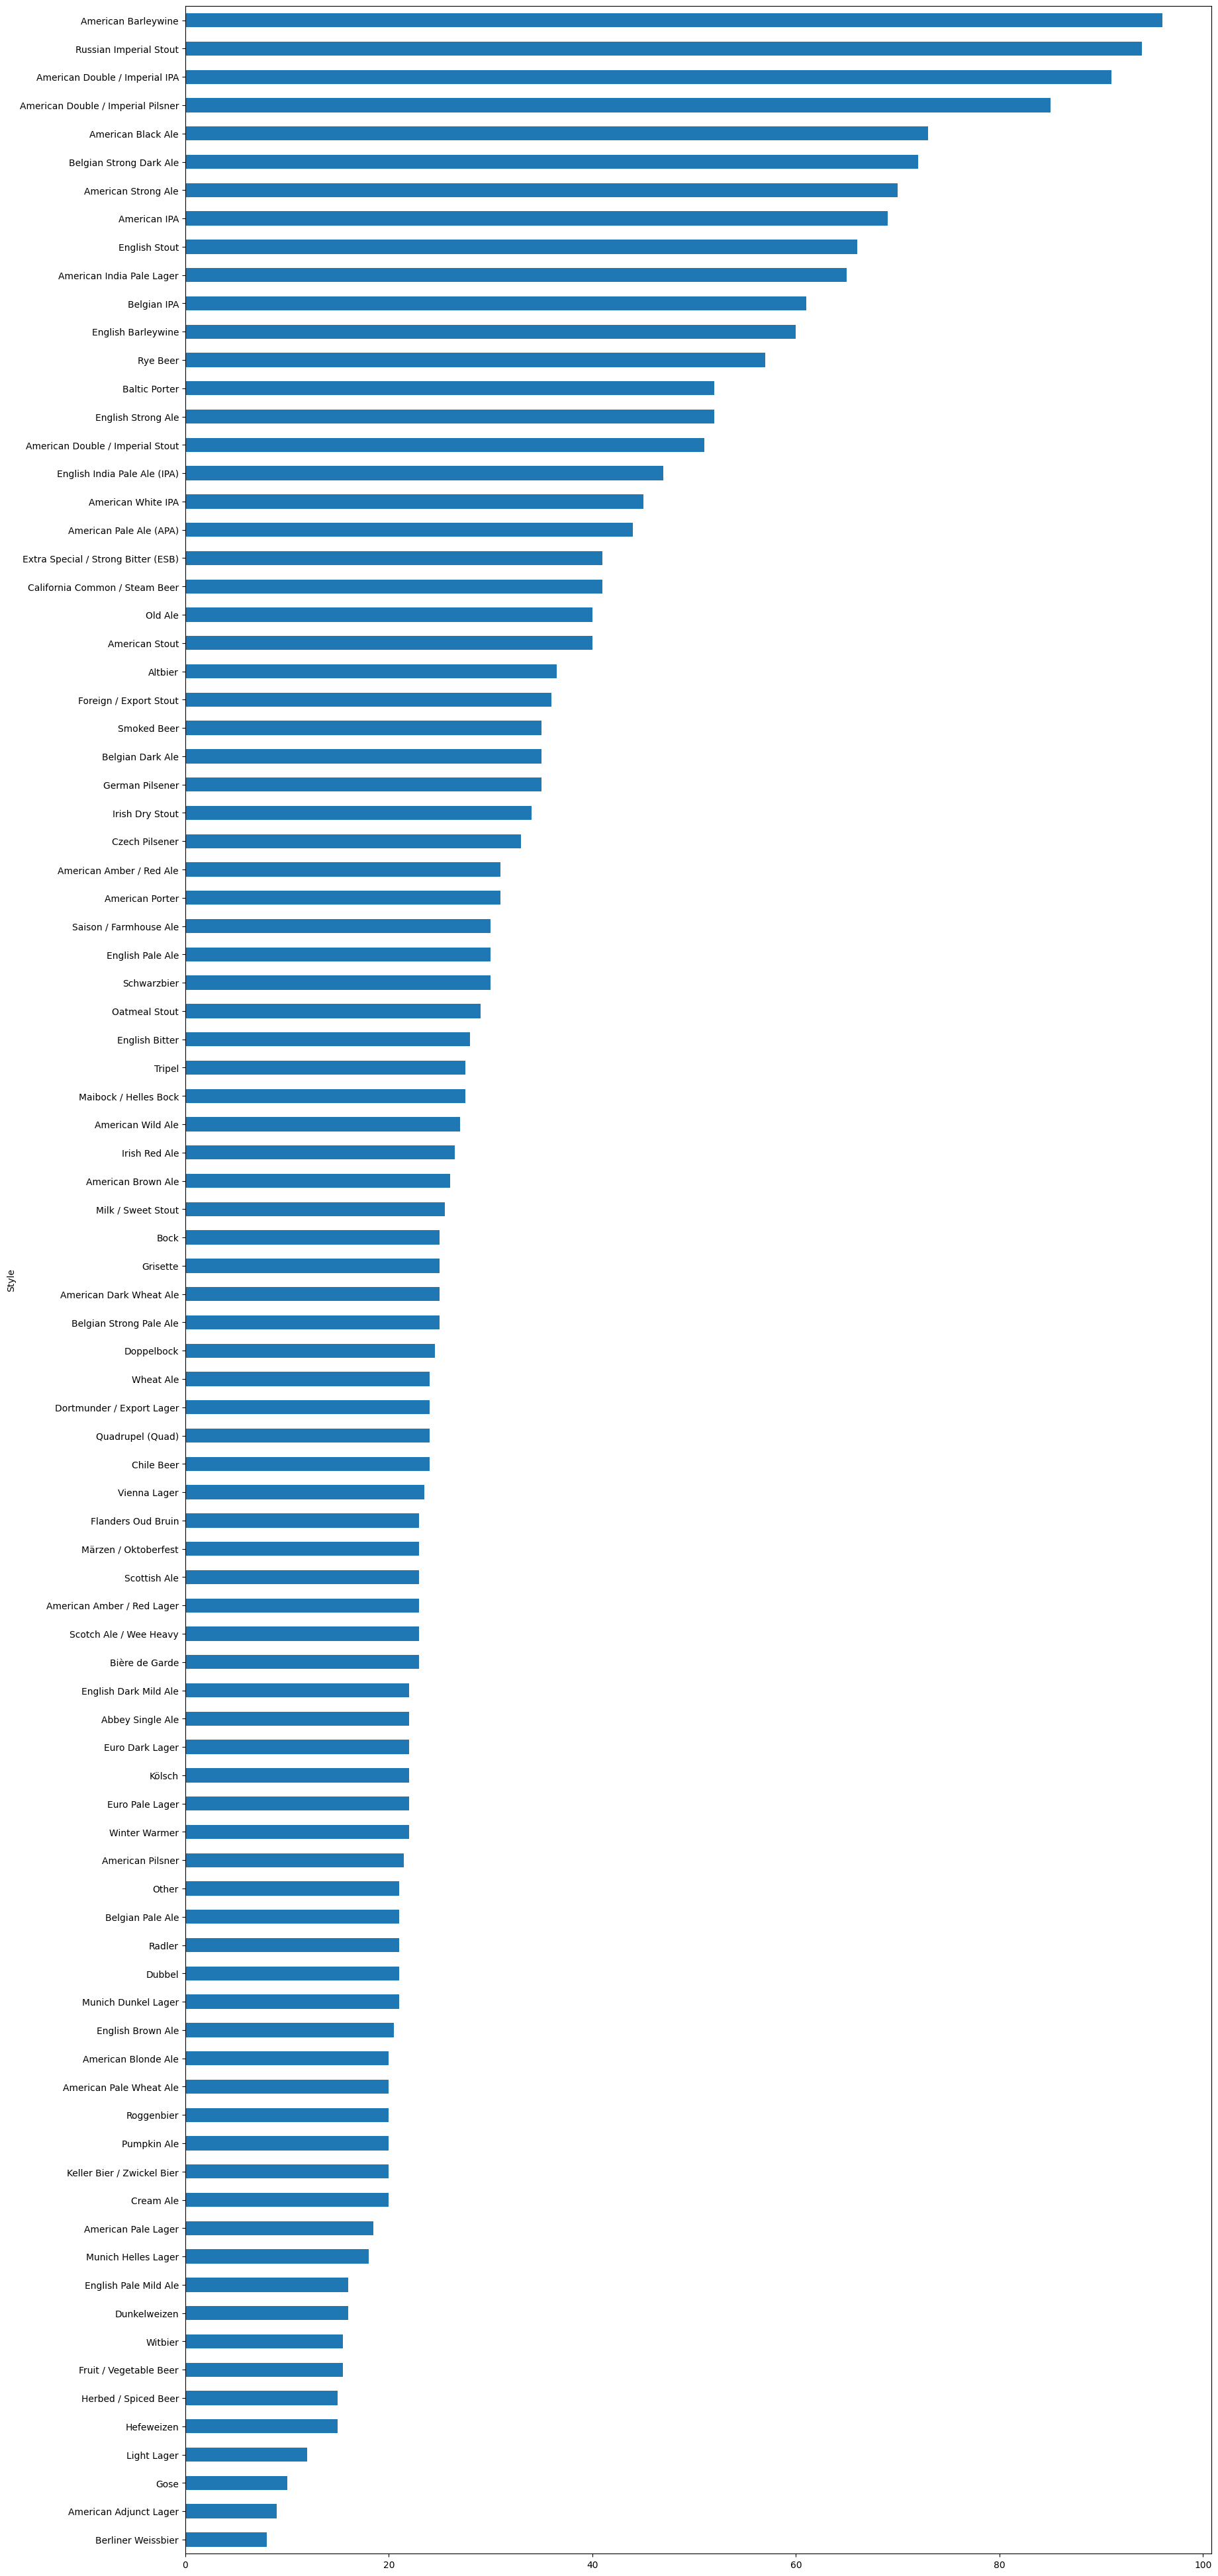

In [43]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=True).dropna().plot(kind='barh', figsize=(20,50))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [59]:
high_ibu = df[df['IBUs'] > major_percentile]
high_ibu['Style'].value_counts().head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [60]:
high_ibu = df[df['IBUs'] > minor_percentile]
high_ibu['Style'].value_counts().head(5)

Style
American IPA                      301
American Pale Ale (APA)           150
American Double / Imperial IPA     75
American Amber / Red Ale           62
American Porter                    33
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [86]:
wheat_beers = df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]
print(wheat_beers['IBUs'].mean())


18.982142857142858


## Draw a histogram of the IBUs of those beers

In [101]:
wheat_beers['IBUs'].hist(bins=30)

<bound method hist_series of 30      19.0
42       NaN
72      64.0
112      NaN
138      NaN
139     16.0
142      NaN
164      NaN
167     10.0
190      NaN
195      NaN
200      NaN
209      NaN
217      NaN
225      NaN
230     11.0
242      NaN
258      NaN
262     28.0
289     20.0
290     20.0
291     20.0
292     20.0
293     20.0
294     20.0
295     20.0
296     20.0
297     20.0
298     20.0
299     20.0
300     20.0
304      NaN
305     17.0
313      6.0
314     16.0
328     14.0
341     18.0
360     11.0
397      NaN
475     25.0
485     18.0
494      NaN
498     20.0
522     16.0
551     21.0
555     20.0
567     18.0
591     16.0
618     15.0
637      NaN
655      NaN
686      NaN
717      NaN
719      NaN
722      NaN
724     15.0
745     61.0
771     27.0
778      8.0
792     16.0
803     28.0
804     15.0
826      NaN
831     30.0
832     30.0
839     18.0
868     28.0
879      NaN
889     42.0
898     23.0
924      NaN
925     15.0
945      NaN
953     35.0
958      

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [99]:
ipa_beers = df[df['Style'].str.contains('IPA', na=False)]
print(ipa_beers)
print(ipa_beers['IBUs'].mean())

                                                 Beer  \
0                                        Get Together   
6                                      Citra Ass Down   
14                                        Rico Sauvin   
17                                       Pile of Face   
24                                     Habitus (2014)   
25                                              Solis   
27                                            Habitus   
33                                           Villager   
38                                             HopArt   
39                                           Boy King   
43                                             Rumble   
45                                              Lasso   
48                                          Titan IPA   
55                                           Nordskye   
59                  98 Problems (Cuz A Hop Ain't One)   
61                                     Grapefruit IPA   
62                             

<Axes: title={'center': 'IBUs distribution for IPAs'}, ylabel='Frequency'>

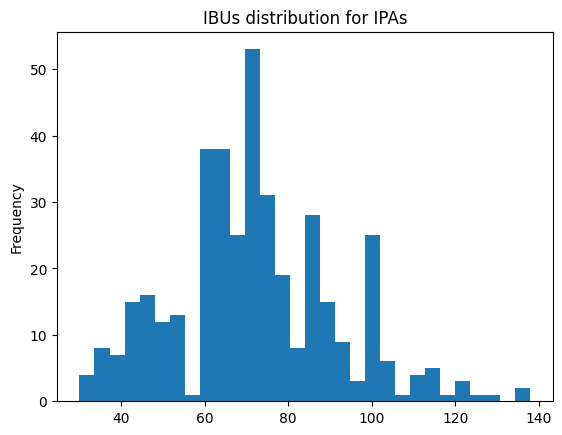

In [100]:
ipa_beers['IBUs'].plot(kind='hist', bins=30, title='IBUs distribution for IPAs')

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

array([[<Axes: title={'center': 'ABV'}>,
        <Axes: title={'center': 'IBUs'}>]], dtype=object)

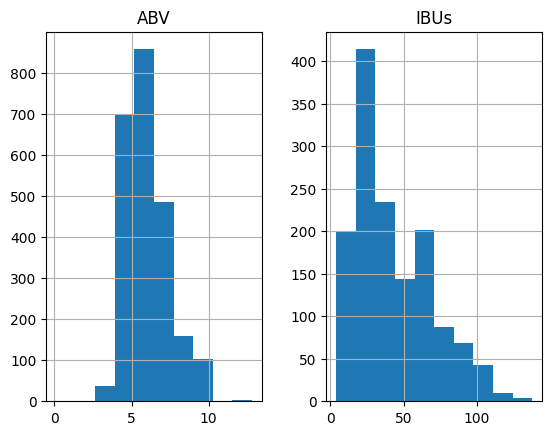

In [102]:
df[['ABV', 'IBUs']].hist()


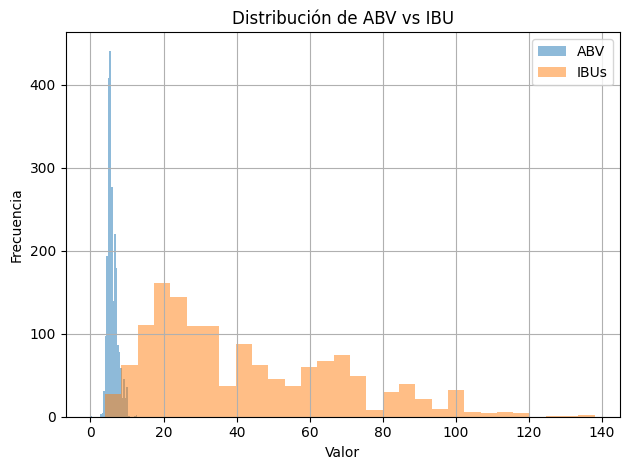

In [103]:
import matplotlib.pyplot as plt

plt.hist(df['ABV'], bins=30, alpha=0.5, label='ABV')
plt.hist(df['IBUs'], bins=30, alpha=0.5, label='IBUs')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de ABV vs IBU')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [108]:
print(f"Average ABV wheat beers {wheat_beers['ABV'].mean():.2f}")

print(f"Average ABV IPA beers {ipa_beers['ABV'].mean():.2f}")


Average ABV wheat beers 5.04
Average ABV IPA beers 6.88


## Good work!